<a href="https://colab.research.google.com/github/andrewwhite5/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/module1-statistics-probability-and-inference/LS_DS_141_Statistics_Probability_and_Inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 1 Sprint 3 Lesson 1*

# Statistics, Probability and Inference

Ever thought about how long it takes to make a pancake? Have you ever compared the tooking time of a pancake on each eye of your stove? Is the cooking time different between the different eyes? Now, we can run an experiment and collect a sample of 1,000 pancakes on one eye and another 800 pancakes on the other eye. Assumed we used the same pan, batter, and technique on both eyes. Our average cooking times were 180 (5 std) and 178.5 (4.25 std) seconds repsectively. Now, we can tell those numbers are not identicial, but how confident are we that those numbers are practically the same? How do we know the slight difference isn't caused by some external randomness?

Yes, today's lesson will help you figure out how long to cook your pancakes (*theoretically*). Experimentation is up to you; otherwise, you have to accept my data as true. How are going to accomplish this? With probability, statistics, inference and maple syrup (optional). 

<img src="https://images.unsplash.com/photo-1541288097308-7b8e3f58c4c6?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=3300&q=80" width=400>

## Learning Objectives
* [Part 1](#p1): Normal Distribution Revisted
* [Part 2](#p2): Student's T Test
* [Part 3](#p3): Hypothesis Test & Doing it Live

## Normal Distribution Revisited

What is the Normal distribution: A probability distribution of a continuous real valued random-variable. The Normal distribution properties make it useful for the *Central Limit Theorm*, because if we assume a variable follows the normal distribution, we can make certain conclusions based on probabilities.

In [0]:
import numpy as np

mu = 180 # mean
sigma = 5 # standard deviation

sample = np.random.normal(mu, sigma, 1000)

In [0]:
sample

In [3]:
np.mean(sample)

179.805069390872

In [4]:
# Verify the mean of our sample
abs(mu - np.mean(sample)) < 1

True

In [5]:
# Verify the variance of our sample
abs(sigma - np.std(sample, ddof=1)) < 0.5

True

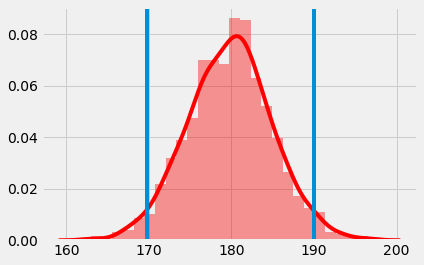

In [6]:
import seaborn as sns
from matplotlib import style

style.use('fivethirtyeight')

ax = sns.distplot(sample, color='r')
ax.axvline(np.percentile(sample,97.5),0)
ax.axvline(np.percentile(sample,2.5),0);

In [7]:
np.percentile(sample, 97.5)

190.00278845012468

## Student's T Test

>Assuming data come from a Normal distribution, the t test provides a way to test whether the sample mean (that is the mean calculated from the data) is a good estimate of the population mean. 

The derivation of the t-distribution was first published in 1908 by William Gosset while working for the Guinness Brewery in Dublin. Due to proprietary issues, he had to publish under a pseudonym, and so he used the name Student.

The t-distribution is essentially a distribution of means of normaly distributed data. When we use a t-statistic, we are  checking that a mean fails within a certain $\alpha$ probability of the mean of means.

In [0]:
t_df10 = np.random.standard_t(df=10, size=10)
t_df100 = np.random.standard_t(df=100, size=100)
t_df1000 = np.random.standard_t(df=1000, size=1000)

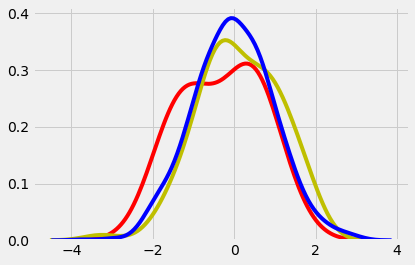

In [9]:
sns.kdeplot(t_df10, color='r');
sns.kdeplot(t_df100, color='y');
sns.kdeplot(t_df1000, color='b');

In [10]:
i = 10
for sample in [t_df10, t_df100, t_df1000]:
    print(f"t - distribution with {i} degrees of freedom")
    print("---" * 10)
    print(f"Mean: {sample.mean()}")
    print(f"Standard Deviation: {sample.std()}")
    print(f"Variance: {sample.var()}")
    i = i*10

t - distribution with 10 degrees of freedom
------------------------------
Mean: -0.3221079790356681
Standard Deviation: 0.9199414996253311
Variance: 0.8462923627329031
t - distribution with 100 degrees of freedom
------------------------------
Mean: 0.11681905836084457
Standard Deviation: 0.9962962135615705
Variance: 0.9926061451571225
t - distribution with 1000 degrees of freedom
------------------------------
Mean: -0.022930261102715985
Standard Deviation: 0.9908823835296359
Variance: 0.9818478979893723


Why is it different from normal? To better reflect the tendencies of small data and situations with unknown population standard deviation. In other words, the normal distribution is still the nice pure ideal (thanks to the central limit theorem), but the t-distribution is much more useful in many real-world situations.

In [11]:
import pandas as pd

# Missing LAR (no team roster page on NFL.com)
teams = ['ARI','ATL','BAL','BUF','CAR','CHI','CIN','CLE','DAL','DEN','DET','GB','HOU',
        'IND','JAX','KC','LAC','MIA','MIN','NE','NO','NYG','NYJ','OAK','PHI',
        'PIT','SEA','SF','TB','TEN','WAS']    
df_list = []
for team in teams: 
    df = pd.read_html(f'http://www.nfl.com/teams/roster?team={team}')[1]
    df['Team'] = team
    df.columns = ['No','Name','Pos','Status','Height','Weight','Birthdate','Exp','College','Team']
    df_list.append(df)
    
final_df = pd.concat(df_list, ignore_index=True)
print(final_df.shape)
final_df.head()

(2916, 10)


,No,Name,Pos,Status,Height,Weight,Birthdate,Exp,College,Team
0,23,"Alford, Robert",CB,ACT,"5'10""",186,11/1/1988,7,Southeastern Louisiana,ARI
1,97,"Allen, Zach",DE,ACT,"6'5""",285,8/20/1997,0,Boston College,ARI
2,3,"Anderson, Drew",QB,ACT,"6'4""",221,10/18/1995,0,Murray State,ARI
3,71,"Bailey, Sterling",DE,ACT,"6'3""",296,9/13/1992,1,Georgia,ARI
4,32,"Baker, Budda",SS,ACT,"5'10""",195,1/10/1996,3,Washington,ARI


## Live Lecture - let's perform and interpret a t-test

We'll generate our own data, so we can know and alter the "ground truth" that the t-test should find. We will learn about p-values and how to interpret "statistical significance" based on the output of a hypothesis test. We will also dig a bit deeper into how the test statistic is calculated based on the sample error, and visually what it looks like to have 1 or 2 "tailed" t-tests.

In [0]:
# TODO - during class, but please help!

from scipy.stats import ttest_ind, ttest_ind_from_stats, ttest_rel

In [0]:
burnerA = np.random.normal(180, 5, 1000)
burnerB = np.random.normal(178.5, 4.25, 800)

In [14]:
burnerA[:10]

array([177.13095134, 182.97031521, 176.29080713, 174.15890819,
       182.09381824, 183.45845355, 175.46157009, 183.38075073,
       181.55733228, 181.66150339])

In [15]:
burnerB[:10]

array([180.59224669, 170.69677872, 180.1641945 , 173.46703503,
       183.82849775, 181.54763746, 175.91771285, 177.62032034,
       180.18415649, 180.56785842])

In [16]:
for sample in [burnerA, burnerB]:
#   mu = sample.mean  # If you weren't able to do f string, you'd have to do it with these two lines
#   print('Mean: {}'.format(mu))
  print(f'Mean: {sample.mean()}')  # f string allows you to compute (sample.mean()) while printing
  print(f'StDev: {sample.std()}')
  print('------')

Mean: 180.07815570674174
StDev: 4.945857824087899
------
Mean: 178.2197785227675
StDev: 4.148228001213638
------


In [17]:
tstat, pvalue = ttest_ind(burnerA, burnerB)
print(tstat)
print(pvalue)

8.496657325367703
4.030489733758278e-17


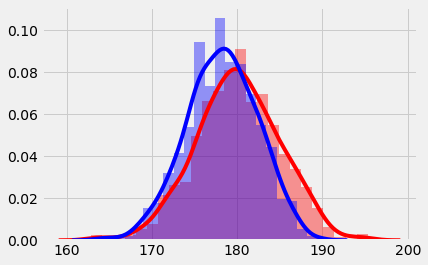

In [18]:
sns.distplot(burnerA, color='r')
sns.distplot(burnerB, color='b');

In [19]:
from sklearn.datasets import load_wine

X = load_wine()
X

{'DESCR': '.. _wine_dataset:\n\nWine recognition dataset\n------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 178 (50 in each of three classes)\n    :Number of Attributes: 13 numeric, predictive attributes and the class\n    :Attribute Information:\n \t\t- Alcohol\n \t\t- Malic acid\n \t\t- Ash\n\t\t- Alcalinity of ash  \n \t\t- Magnesium\n\t\t- Total phenols\n \t\t- Flavanoids\n \t\t- Nonflavanoid phenols\n \t\t- Proanthocyanins\n\t\t- Color intensity\n \t\t- Hue\n \t\t- OD280/OD315 of diluted wines\n \t\t- Proline\n\n    - class:\n            - class_0\n            - class_1\n            - class_2\n\t\t\n    :Summary Statistics:\n    \n    ============================= ==== ===== ======= =====\n                                   Min   Max   Mean     SD\n    ============================= ==== ===== ======= =====\n    Alcohol:                      11.0  14.8    13.0   0.8\n    Malic Acid:                   0.74  5.80    2.34  1.12\n    Ash:           

In [20]:
import pandas as pd
wine = pd.DataFrame(X['data'], columns=X['feature_names'])
wine['origin'] = X['target']
print(wine.shape)
wine.head()

(178, 14)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,origin
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [21]:
wine['origin'].value_counts()

1    71
0    59
2    48
Name: origin, dtype: int64

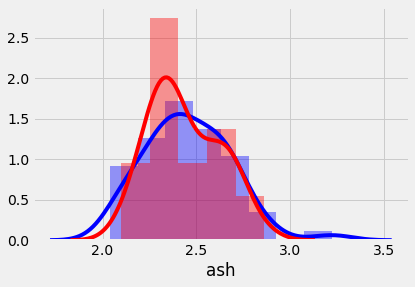

In [22]:
sns.distplot(wine[wine['origin'] == 0]['ash'], color = 'b')
sns.distplot(wine[wine['origin'] == 2]['ash'], color = 'r');

In [23]:
tstat, pvalue = ttest_ind(wine[wine['origin'] == 0]['ash'], wine[wine['origin'] == 2]['ash'])
print(tstat)
print(pvalue)

0.4551468326841644
0.6499433346755791


/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


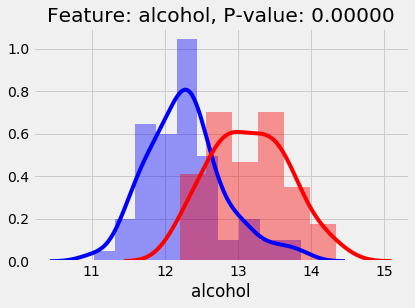

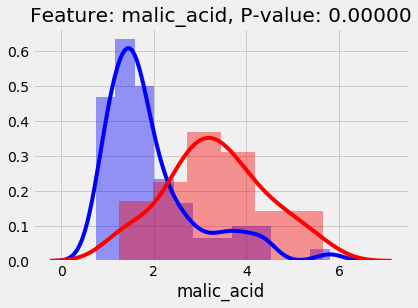

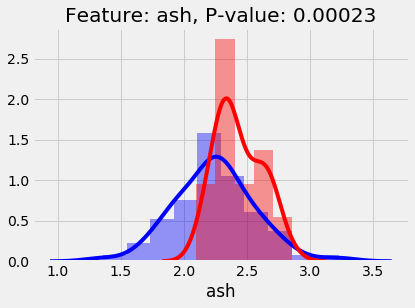

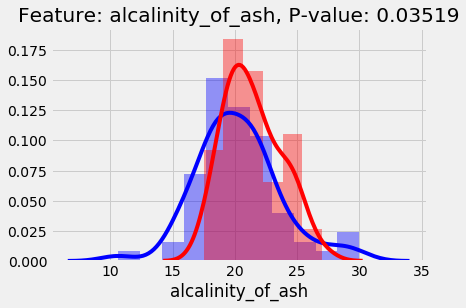

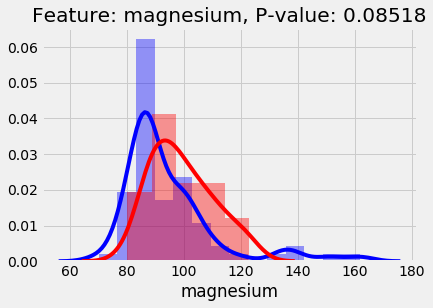

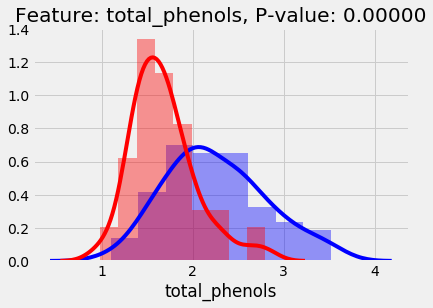

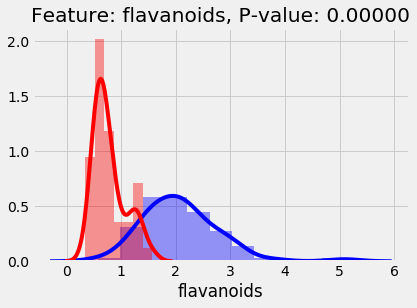

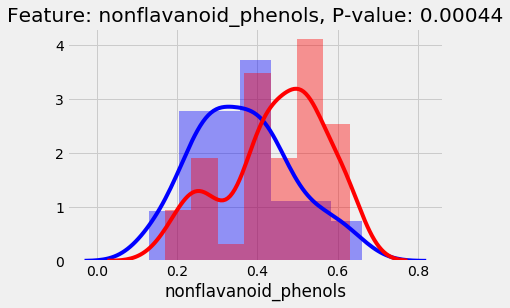

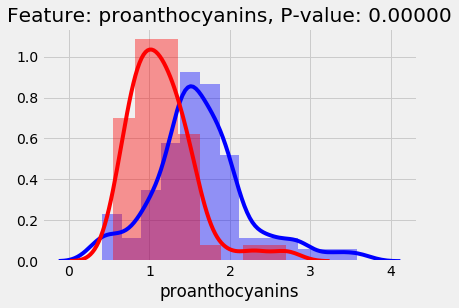

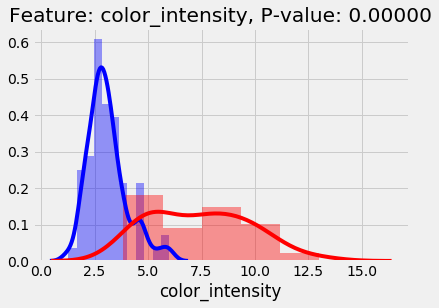

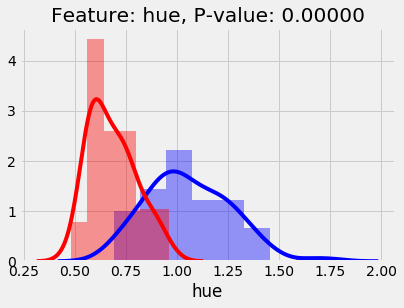

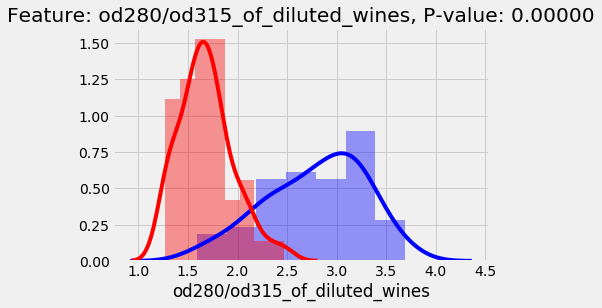

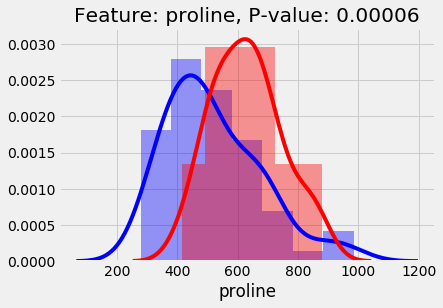

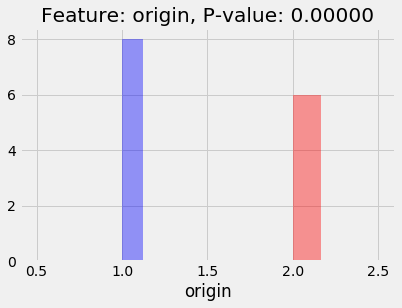

<Figure size 432x288 with 0 Axes>

In [24]:
import matplotlib.pyplot as plt

for feat in wine.columns:
  # Split groups
  group1 = wine[wine['origin'] == 1][feat]
  group2 = wine[wine['origin'] == 2][feat]
  
  # Plot distribution
  sns.distplot(group1, color = 'b')
  sns.distplot(group2, color = 'r')
  
  # Run t-test
  _, pvalue = ttest_ind(group1, group2)
  
  # Plot
  plt.title(f'Feature: {feat}, P-value: {pvalue:.5f}')
  plt.figure();

## Resources

- https://homepage.divms.uiowa.edu/~mbognar/applets/t.html
- https://rpsychologist.com/d3/tdist/
- https://gallery.shinyapps.io/tdist/
- https://en.wikipedia.org/wiki/Standard_deviation#Sample_standard_deviation_of_metabolic_rate_of_northern_fulmars
- https://www.khanacademy.org/math/ap-statistics/two-sample-inference/two-sample-t-test-means/v/two-sample-t-test-for-difference-of-means

----------------------------------

# **Assignment**

## Apply the t-test to real data

Your assignment is to determine which issues have "statistically significant" differences between political parties in this [1980s congressional voting data](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records). The data consists of 435 instances (one for each congressperson), a class (democrat or republican), and 16 binary attributes (yes or no for voting for or against certain issues). Be aware - there are missing values!

Your goals:

1. Load and clean the data (or determine the best method to drop observations when running tests)
2. Using hypothesis testing, find an issue that democrats support more than republicans with p < 0.01
3. Using hypothesis testing, find an issue that republicans support more than democrats with p < 0.01
4. Using hypothesis testing, find an issue where the difference between republicans and democrats has p > 0.1 (i.e. there may not be much of a difference)

Note that this data will involve *2 sample* t-tests, because you're comparing averages across two groups (republicans and democrats) rather than a single group against a null hypothesis.

Stretch goals:

1. Refactor your code into functions so it's easy to rerun with arbitrary variables
2. Apply hypothesis testing to your personal project data (for the purposes of this notebook you can type a summary of the hypothesis you formed and tested)

##Read in the data

In [0]:
import pandas as pd
import numpy as np

In [27]:
from google.colab import files
uploaded = files.upload()

Saving house-votes-84.data to house-votes-84.data


In [28]:
df = pd.read_csv('house-votes-84.data')
print(df.shape)
df.head()

(434, 17)


,republican,n,y,n.1,y.1,y.2,y.3,n.2,n.3,n.4,y.4,?,y.5,y.6,y.7,n.5,y.8
0,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
1,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
2,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
3,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y
4,democrat,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y


In [29]:
col_headers = ['Party', 'Handicapped Infants', 'Water Project Cost Sharing', 'Adoption of Budget Resolution', 
               'Physician Fee Freeze', 'El Salvador Aid', 'Religious Groups in Schools', 'Anti-Satellite Test Ban', 
               'Aid to Nicaraguan Contras', 'Mx Missile', 'Immigration', 'Synfuels Corporation Cutback', 
               'Education Spending', 'Superfund Right to Sue', 'Crime', 'Duty Free Exports', 
               'Export Administration Act South Africa']

df = pd.read_csv('house-votes-84.data', header=None, names=col_headers, na_values='?')
df.head()

,Party,Handicapped Infants,Water Project Cost Sharing,Adoption of Budget Resolution,Physician Fee Freeze,El Salvador Aid,Religious Groups in Schools,Anti-Satellite Test Ban,Aid to Nicaraguan Contras,Mx Missile,Immigration,Synfuels Corporation Cutback,Education Spending,Superfund Right to Sue,Crime,Duty Free Exports,Export Administration Act South Africa
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


In [30]:
df.describe()

,Party,Handicapped Infants,Water Project Cost Sharing,Adoption of Budget Resolution,Physician Fee Freeze,El Salvador Aid,Religious Groups in Schools,Anti-Satellite Test Ban,Aid to Nicaraguan Contras,Mx Missile,Immigration,Synfuels Corporation Cutback,Education Spending,Superfund Right to Sue,Crime,Duty Free Exports,Export Administration Act South Africa
count,435,423,387,424,424,420,424,421,420,413,428,414,404,410,418,407,331
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,democrat,n,y,y,n,y,y,y,y,y,y,n,n,y,y,n,y
freq,267,236,195,253,247,212,272,239,242,207,216,264,233,209,248,233,269


In [31]:
df.isna().sum()

Party                                       0
Handicapped Infants                        12
Water Project Cost Sharing                 48
Adoption of Budget Resolution              11
Physician Fee Freeze                       11
El Salvador Aid                            15
Religious Groups in Schools                11
Anti-Satellite Test Ban                    14
Aid to Nicaraguan Contras                  15
Mx Missile                                 22
Immigration                                 7
Synfuels Corporation Cutback               21
Education Spending                         31
Superfund Right to Sue                     25
Crime                                      17
Duty Free Exports                          28
Export Administration Act South Africa    104
dtype: int64

In [32]:
df = df.drop(columns='Export Administration Act South Africa')  # Too many missing values
df.head()

,Party,Handicapped Infants,Water Project Cost Sharing,Adoption of Budget Resolution,Physician Fee Freeze,El Salvador Aid,Religious Groups in Schools,Anti-Satellite Test Ban,Aid to Nicaraguan Contras,Mx Missile,Immigration,Synfuels Corporation Cutback,Education Spending,Superfund Right to Sue,Crime,Duty Free Exports
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y


In [33]:
df = df.fillna(method='bfill')
df.head()

,Party,Handicapped Infants,Water Project Cost Sharing,Adoption of Budget Resolution,Physician Fee Freeze,El Salvador Aid,Religious Groups in Schools,Anti-Satellite Test Ban,Aid to Nicaraguan Contras,Mx Missile,Immigration,Synfuels Corporation Cutback,Education Spending,Superfund Right to Sue,Crime,Duty Free Exports
0,republican,n,y,n,y,y,y,n,n,n,y,n,y,y,y,n
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n
2,democrat,n,y,y,n,y,y,n,n,n,n,y,n,y,y,n
3,democrat,n,y,y,n,y,y,n,n,n,n,y,n,y,n,n
4,democrat,y,y,y,n,y,y,n,n,n,n,y,n,y,y,y


In [34]:
df['Duty Free Exports'] = df['Duty Free Exports'].fillna(method='ffill')
df.tail()

,Party,Handicapped Infants,Water Project Cost Sharing,Adoption of Budget Resolution,Physician Fee Freeze,El Salvador Aid,Religious Groups in Schools,Anti-Satellite Test Ban,Aid to Nicaraguan Contras,Mx Missile,Immigration,Synfuels Corporation Cutback,Education Spending,Superfund Right to Sue,Crime,Duty Free Exports
430,republican,n,n,y,y,y,y,n,n,y,y,n,y,y,y,n
431,democrat,n,n,y,n,n,n,y,y,y,y,n,n,n,n,n
432,republican,n,n,n,y,y,y,n,n,n,n,y,y,y,y,n
433,republican,n,n,n,y,y,y,n,n,n,y,n,y,y,y,n
434,republican,n,y,n,y,y,y,n,n,n,y,n,y,y,y,n


##Hypothesis 1:
###H<sub>0</sub>: μ (Republican support of Synfuels Corporation Cutback Bill)  == μ (Democratic support of Synfuels Corporation Cutback Bill)

###H<sub>1</sub>: μ (Republican support of Synfuels Corporation Cutback Bill) < μ (Democratic support of Synfuels Corporation Cutback Bill)





In [0]:
# columns = ['Handicapped Infants', 'Water Project Cost Sharing', 'Adoption of Budget Resolution', 
#                'Physician Fee Freeze', 'El Salvador Aid', 'Religious Groups in Schools', 'Anti-Satellite Test Ban', 
#                'Aid to Nicaraguan Contras', 'Mx Missile', 'Immigration', 'Synfuels Corporation Cutback', 
#                'Education Spending', 'Superfund Right to Sue', 'Crime', 'Duty Free Exports']

# df_new = []

# def give_numbers():
#   for _ in columns:
#     df_new.append(df[_].replace({'y': 1, 'n': 0}))
    
# give_numbers()

In [0]:
# df_new.head()

In [0]:
df['Synfuels Corporation Cutback'] = df['Synfuels Corporation Cutback'].replace({'y': 1, 'n': 0})
df['Religious Groups in Schools'] = df['Religious Groups in Schools'].replace({'y': 1, 'n': 0})
df['Immigration'] = df['Immigration'].replace({'y': 1, 'n': 0})

In [38]:
df['Synfuels Corporation Cutback'].head(10)

0    0
1    0
2    1
3    1
4    1
5    0
6    0
7    0
8    0
9    0
Name: Synfuels Corporation Cutback, dtype: int64

In [39]:
pd.crosstab(df['Party'], df['Synfuels Corporation Cutback'])

Synfuels Corporation Cutback,0,1
Party,,
democrat,133,134
republican,143,25


In [40]:
rep = df[df['Party'].isin(['republican'])]
dem = df[df['Party'].isin(['democrat'])]
rep.head()

,Party,Handicapped Infants,Water Project Cost Sharing,Adoption of Budget Resolution,Physician Fee Freeze,El Salvador Aid,Religious Groups in Schools,Anti-Satellite Test Ban,Aid to Nicaraguan Contras,Mx Missile,Immigration,Synfuels Corporation Cutback,Education Spending,Superfund Right to Sue,Crime,Duty Free Exports
0,republican,n,y,n,y,y,1,n,n,n,1,0,y,y,y,n
1,republican,n,y,n,y,y,1,n,n,n,0,0,y,y,y,n
7,republican,n,y,n,y,y,1,n,n,n,0,0,n,y,y,n
8,republican,n,y,n,y,y,1,n,n,n,0,0,y,y,y,n
10,republican,n,y,n,y,y,0,n,n,n,0,1,n,y,y,n


In [41]:
dem.head()

,Party,Handicapped Infants,Water Project Cost Sharing,Adoption of Budget Resolution,Physician Fee Freeze,El Salvador Aid,Religious Groups in Schools,Anti-Satellite Test Ban,Aid to Nicaraguan Contras,Mx Missile,Immigration,Synfuels Corporation Cutback,Education Spending,Superfund Right to Sue,Crime,Duty Free Exports
2,democrat,n,y,y,n,y,1,n,n,n,0,1,n,y,y,n
3,democrat,n,y,y,n,y,1,n,n,n,0,1,n,y,n,n
4,democrat,y,y,y,n,y,1,n,n,n,0,1,n,y,y,y
5,democrat,n,y,y,n,y,1,n,n,n,0,0,n,y,y,y
6,democrat,n,y,n,y,y,1,n,n,n,0,0,n,y,y,y


In [0]:
from scipy.stats import ttest_ind, ttest_ind_from_stats, ttest_rel

In [43]:
tstat, pvalue = ttest_ind((dem['Synfuels Corporation Cutback'] == 1), (rep['Synfuels Corporation Cutback'] == 1))
print(tstat)
print(pvalue)

7.951508196691867
1.618715709606326e-14


###Reject the null hypothesis (H<sub>0</sub>)

##Hypothesis 2:
###H<sub>0</sub>: μ (Republican support of Religious Groups in Schools Bill)  == μ (Democratic support of Religious Groups in Schools Bill)

###H<sub>1</sub>: μ (Republican support of Religious Groups in Schools Bill) > μ (Democratic support of Religious Groups in Schools Bill)

In [0]:
# rep['Religious Groups in Schools'] = rep['Religious Groups in Schools'].replace({'y': 1, 'n': 0})
# dem['Religious Groups in Schools'] = dem['Religious Groups in Schools'].replace({'y': 1, 'n': 0})

In [45]:
rep['Religious Groups in Schools'].head()

0     1
1     1
7     1
8     1
10    0
Name: Religious Groups in Schools, dtype: int64

In [46]:
dem['Religious Groups in Schools'].head()

2    1
3    1
4    1
5    1
6    1
Name: Religious Groups in Schools, dtype: int64

In [47]:
pd.crosstab(df['Party'], df['Religious Groups in Schools'])

Religious Groups in Schools,0,1
Party,,
democrat,141,126
republican,19,149


In [48]:
tstat, pvalue = ttest_ind((dem['Religious Groups in Schools'] == 1), (rep['Religious Groups in Schools'] == 1))
print(tstat)
print(pvalue)

-9.602708758468282
6.365428881925945e-20


###Reject the null hypothesis (H<sub>0</sub>)

##Hypothesis 3:
###H<sub>0</sub>: μ (Republican support of Immigration Bill)  == μ (Democratic support of Immigration Bill)

###H<sub>1</sub>: μ (Republican support of Immigration Bill) != μ (Democratic support of Immigration Bill)

In [0]:
# rep['Immigration'] = rep['Immigration'].replace({'y': 1, 'n': 0})
# dem['Immigration'] = dem['Immigration'].replace({'y': 1, 'n': 0})

In [50]:
rep['Immigration'].head()

0     1
1     0
7     0
8     0
10    0
Name: Immigration, dtype: int64

In [51]:
dem['Immigration'].head()

2    0
3    0
4    0
5    0
6    0
Name: Immigration, dtype: int64

In [52]:
pd.crosstab(df['Party'], df['Immigration'])

Immigration,0,1
Party,,
democrat,140,127
republican,75,93


In [53]:
tstat, pvalue = ttest_ind((dem['Immigration'] == 1), (rep['Immigration'] == 1))
print(tstat)
print(pvalue)

-1.5834489375006358
0.11404925251581424


###Fail to reject the null hypothesis (H<sub>0</sub>)